In [1]:
import geopandas as gpd

In [1]:
from dbfread import DBF

In [29]:
districts_layer = gpd.read_file('Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp')

# Print the first few rows of the GeoDataFrame
districts_layer.head()


,FID_1,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
0,71,El Ghabra,MR03106,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.064756,0.047306,558.684431,"POLYGON ((-12.43278 16.60025, -12.63382 16.484..."
1,77,Guerou,MR03301,None,Guerou,MR033,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,0.466595,0.009926,117.075519,"POLYGON ((-11.73593 16.81811, -11.87343 16.777..."
2,66,Barkeiwel,MR03101,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,0.539027,0.013975,164.969406,"POLYGON ((-12.47354 16.62812, -12.53268 16.668..."
3,91,Legrane,MR03506,None,Kiffa,MR035,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.794763,0.269195,3183.059156,"POLYGON ((-11.63276 16.28856, -11.66745 16.002..."
4,82,Sani,MR03402,None,Kankoussa,MR034,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.498810,0.131890,1560.970072,"POLYGON ((-11.18513 16.28856, -11.18472 16.141..."


In [30]:
#print out the shape of the dataset
districts_layer.shape

(26, 17)

In [31]:
region_layer=gpd.read_file('Datasets_Hackathon/Admin_layers/Assaba_Region_layer.shp')
region_layer.head()

,FID_1,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
0,6,Boumdeid,MR032,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,3.975597,0.368397,4323.851319,"POLYGON ((-11.04988 17.46726, -11.1181 17.3996..."
1,7,Kankoussa,MR034,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,4.373495,0.874687,10369.305326,"POLYGON ((-10.89745 15.10986, -10.89839 15.108..."
2,8,Barkéol,MR031,Barkeol,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,4.190714,0.546288,6448.722910,"POLYGON ((-12.09018 16.73403, -12.08982 16.733..."
3,4,Guerou,MR033,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.499498,0.237509,2800.699987,"POLYGON ((-11.95212 17.09488, -11.923 17.08261..."
4,5,Kiffa,MR035,None,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,6.705719,1.020179,12041.829921,"POLYGON ((-10.83221 16.28856, -10.832 16.28824..."


In [32]:
region_layer.shape

(5, 15)

2. climate precipitation

In [8]:
import rasterio
from rasterio.plot import show

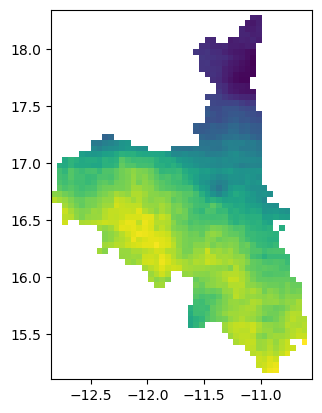

CRS (Coordinate Reference System): EPSG:4326
Transform: | 0.05, 0.00,-12.85|
| 0.00,-0.05, 18.35|
| 0.00, 0.00, 1.00|
Width: 46
Height: 65
Data shape: (65, 46)


In [ ]:
# one exmaple for reading climate precipatation file
with rasterio.open('Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif') as dataset:
    show(dataset)
    
    # get geographic information
    print("CRS (Coordinate Reference System):", dataset.crs)
    print("Transform:", dataset.transform)  
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    
    # read data
    data = dataset.read(1)  # 读取第一波段
    print("Data shape:", data.shape)

In [17]:
import matplotlib.pyplot as plt
import os

d:\Anaconda\anaconda3\lib\site-packages\matplotlib\image.py:503: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)


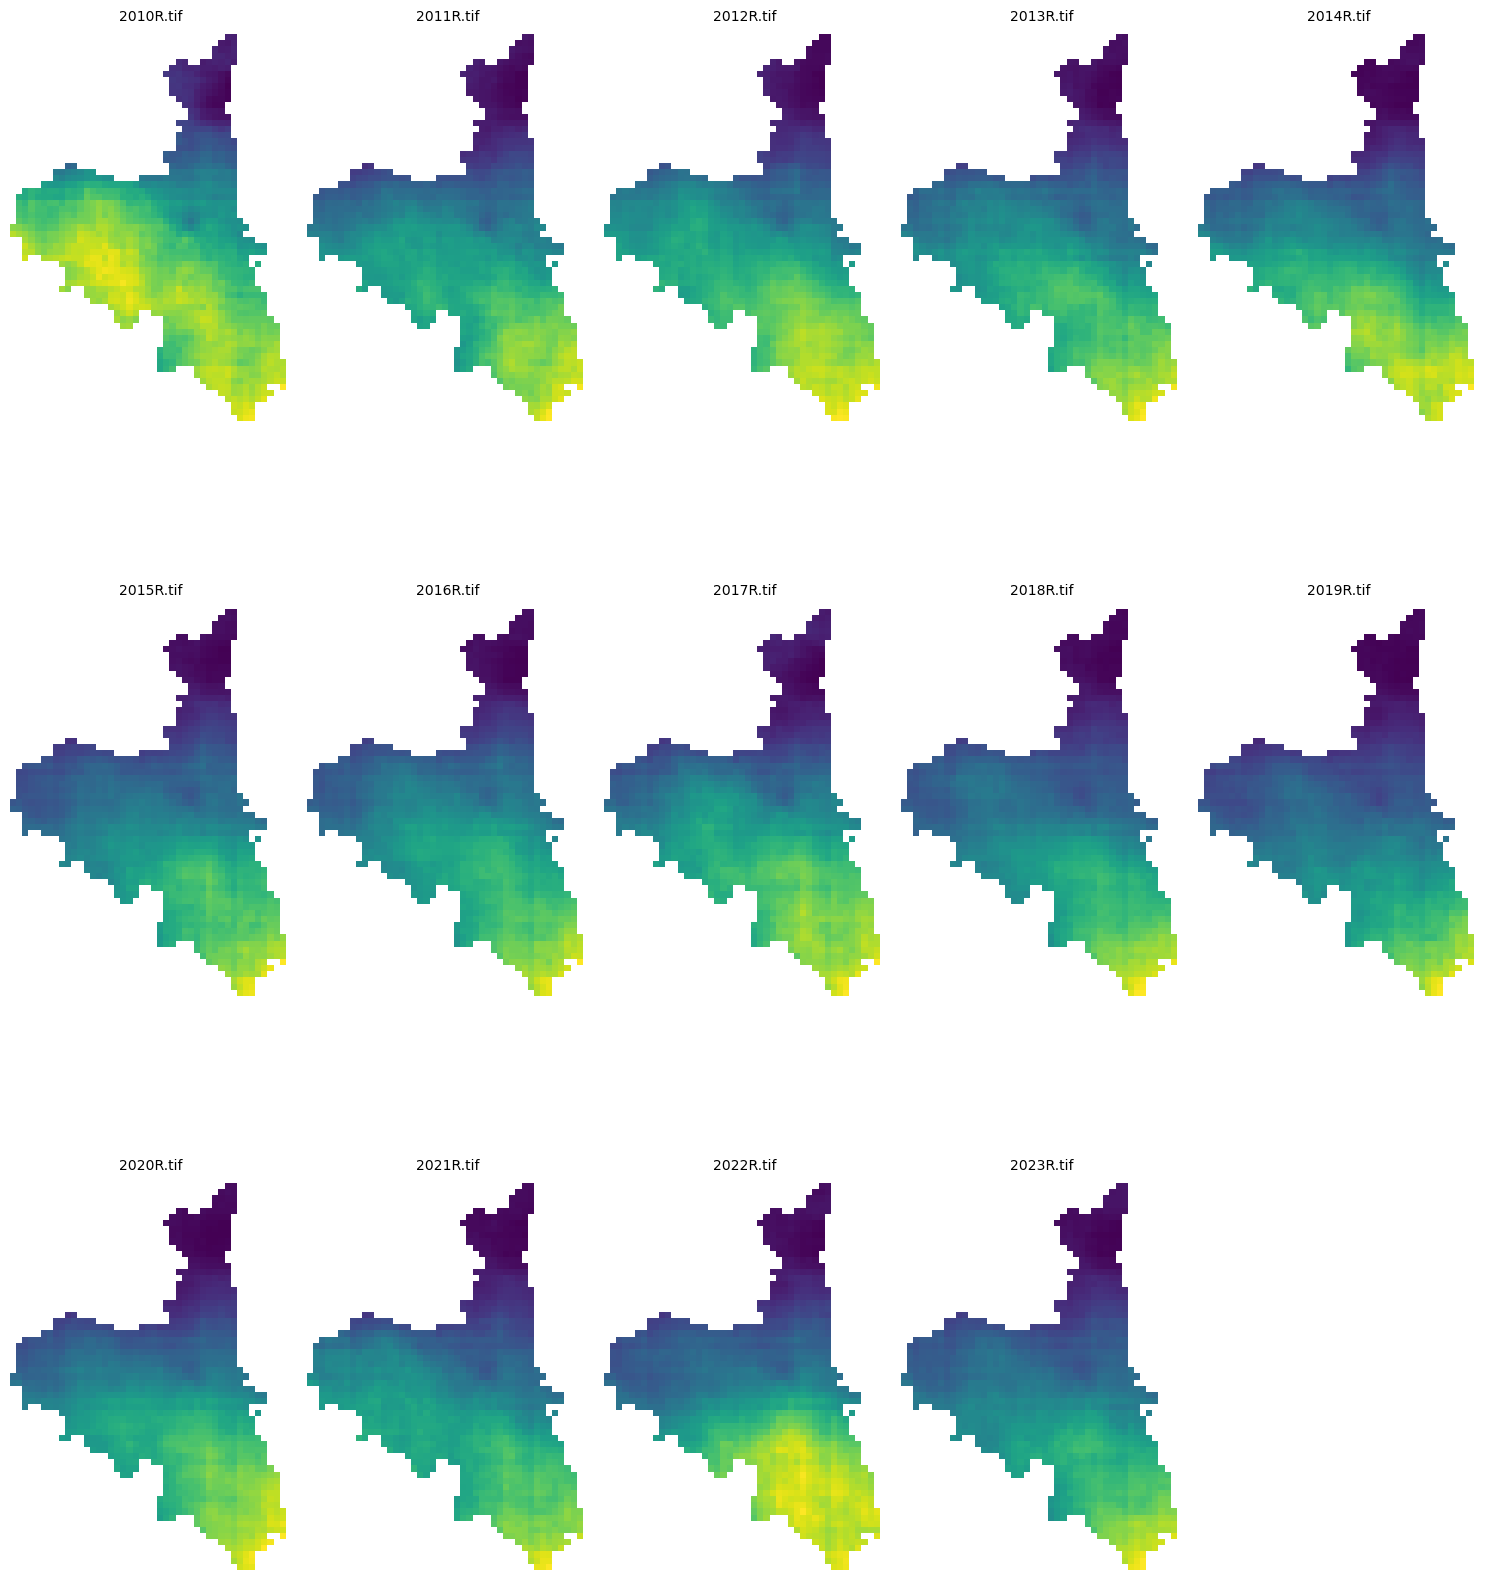

In [ ]:
# path for GPP folder
folder_path = 'Datasets_Hackathon/Climate_Precipitation_Data/'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: int(x[:4]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax)
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()